# Exploratory Data Analysis with Data Visualizations

## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module2BusinessStat/Project/abtest.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#shape of the data
df.shape

(100, 6)

Observation: There are 100 rows and 6 columns.

In [ ]:
#statistical summary for the numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Observation: For time_spent_on_the_page,
* Mean: 5.3778
* Std: 2.3781
* Min: 0.19
* Max: 10.71

In [ ]:
#statistical summary for the categorical variables
#coverting "objects" to "category"  -- 'group', 'landing_page', 'converted', 'language_preferred' into categorical data

for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [ ]:
df.describe(include=["category"])

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


In [ ]:
for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    print(df[col].unique())

['control', 'treatment']
Categories (2, object): ['control', 'treatment']
['old', 'new']
Categories (2, object): ['new', 'old']
['no', 'yes']
Categories (2, object): ['no', 'yes']
['Spanish', 'English', 'French']
Categories (3, object): ['English', 'French', 'Spanish']


Observation:

* Group: There are two unique values- Control, Treatment. Each occuring 50 times.
* Landing Page: There are 2 unquie values - New, Old. Each occuring 50 times.
* Converted: Two unique values: Yes, No. There are more number of people who converted in the dataset compared to who are not. Converted being 54 records.
* Language Preferred: There are 3 different languages - English, French, Spanish.

In [ ]:
#Check for missing values
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observation: No columns have missing/null data

In [ ]:
#check for duplicates
df.duplicated().sum()

0

Observation: All records are unique and there is no duplicates found.

### Univariate Analysis

#### UserID

In [ ]:
df['user_id'].nunique()

100

Observation: There are 100 unique valid data records collected by Enews express. All samples are independent and are not duplicates.

#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

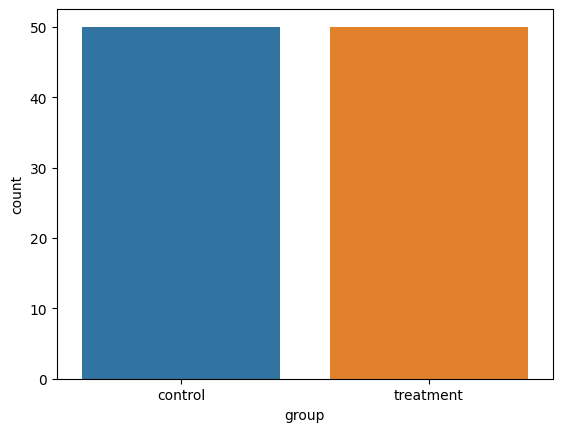

In [ ]:
sns.countplot(data=df,x='group');

Observation: Equal number of control and treatment responses are found.

#### Landing Page

In [ ]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

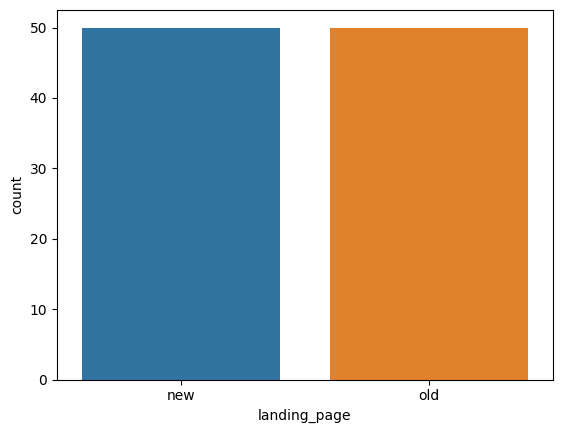

In [ ]:
sns.countplot(data=df,x='landing_page');

Observation: Landing pages are equally distributed in the sample.

#### Time Spent on the page

In [ ]:
df['time_spent_on_the_page'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

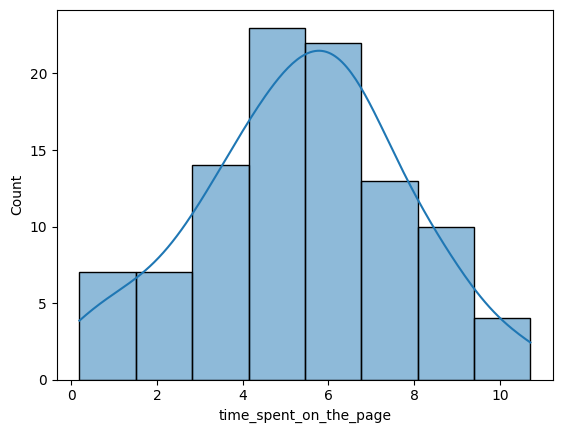

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True);

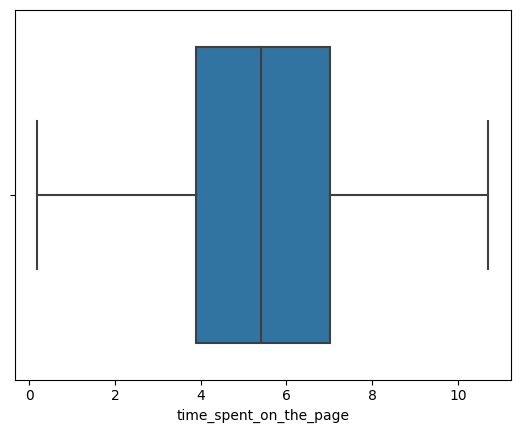

In [ ]:
sns.boxplot(data=df,x='time_spent_on_the_page');

Observation: No outliers found in the users time spent. Time_spent_on_the_page follows a normal distribution with mean 5.377800 and std 2.378166

#### Converted

In [ ]:
df['converted'].value_counts(normalize=True)

yes    0.54
no     0.46
Name: converted, dtype: float64

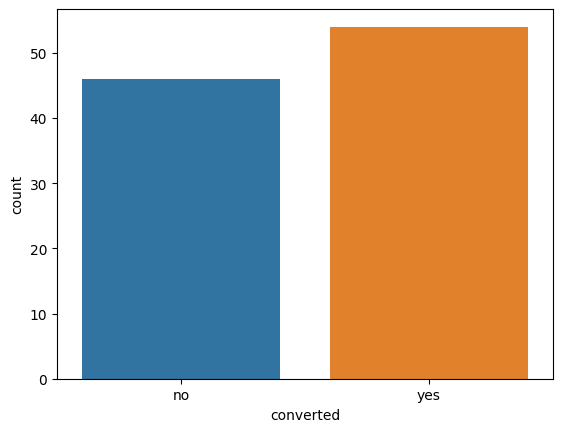

In [ ]:
sns.countplot(data=df,x='converted');

Observation: 54% of users are converted and 46% of users are not converted.

#### Language Preferred

In [ ]:
df['language_preferred'].value_counts(normalize=True)

French     0.34
Spanish    0.34
English    0.32
Name: language_preferred, dtype: float64

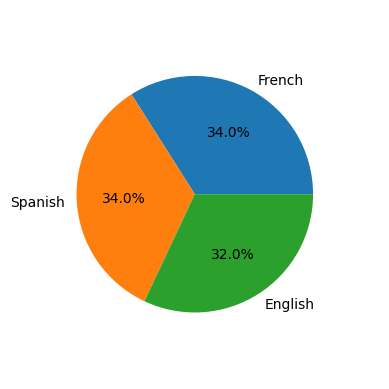

In [ ]:
# Pie chart
labels = ['French', 'Spanish', 'English']
plt.pie(df['language_preferred'].value_counts(), autopct = '%.1f%%', radius = 0.8,
        labels = labels)
plt.show()

Observation: There are almost equal number(34%) of French , Spanish preferring users and slightly lesser(32%) english preferring users.

### Bivariate Analysis

In [ ]:
df.groupby('group')['landing_page'].value_counts()

group      landing_page
control    old             50
           new              0
treatment  new             50
           old              0
Name: landing_page, dtype: int64

Observation: We can confirm that Control group is given the old landing page and Treatment group is given new landing page. From, here on performing analysis using the group alone.

#### Time_spent_on_the_page vs Group

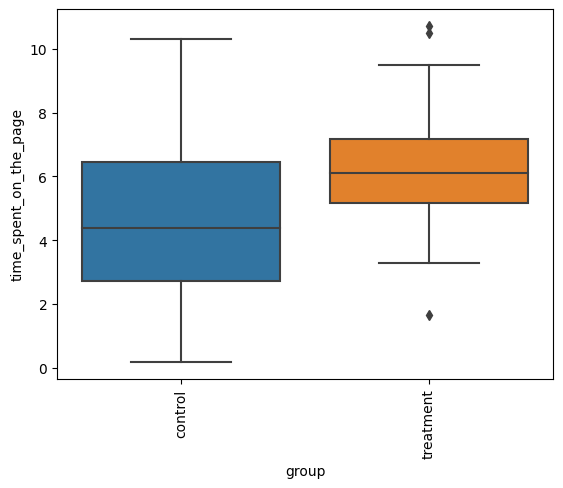

In [ ]:
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('group')['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

Observation: The treatment group users spend more time on the landing page compared to the control group. Also ,there are some outliers in the treatment group.

#### Time_spent_on_the_page vs Landing_page

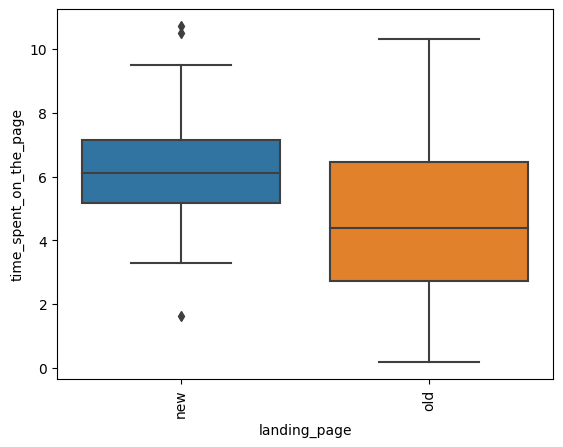

In [ ]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('landing_page')['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

Observation: The average time spent by users of new page is higher, which means the users spend more time than the old one. More Engaging maybe.

#### Time_spent_on_the_page vs Language_preferred

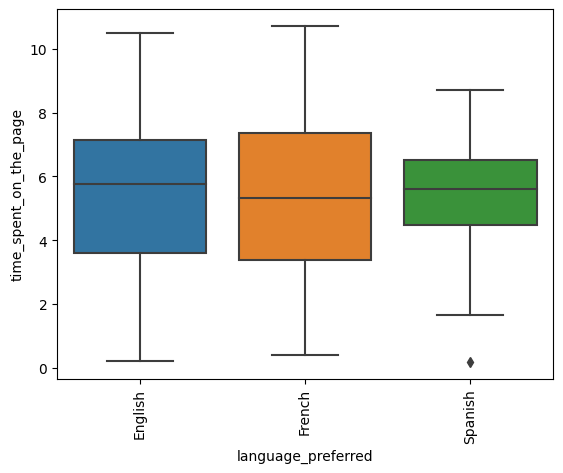

In [ ]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

Observation: The average time spent on the landing page seems similar for all the three languages.

#### Time_spent_on_the_page vs Converted

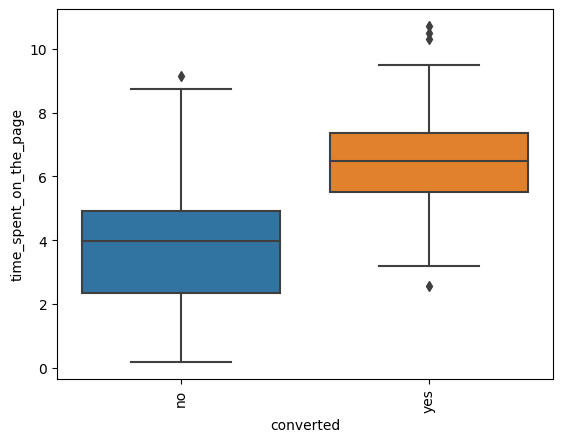

In [ ]:
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('converted')['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

Observation: Users who converted spend more time on average than those who were not converted

#### Time_spent_on_the_page vs Group vs language_preferred

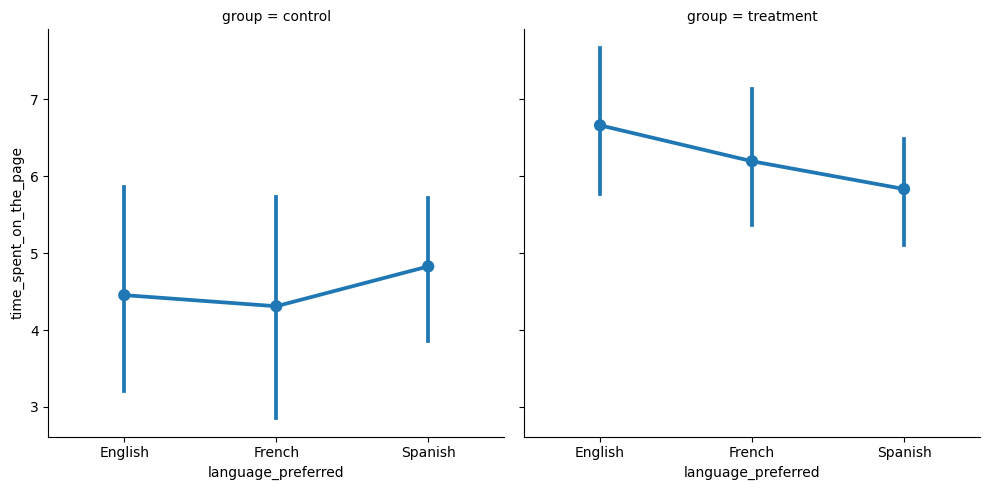

In [ ]:
sns.catplot(data=df,x='language_preferred',y='time_spent_on_the_page',col='group',kind='point');

In [ ]:
df.groupby(['group','language_preferred'])['time_spent_on_the_page'].mean()

group      language_preferred
control    English               4.454375
           French                4.310000
           Spanish               4.828235
treatment  English               6.663750
           French                6.196471
           Spanish               5.835294
Name: time_spent_on_the_page, dtype: float64

Observation: Irrespective of the language, users have greater average time spending in the treatment group than the control group.

#### Time_spent_on_the_page vs Group vs converted

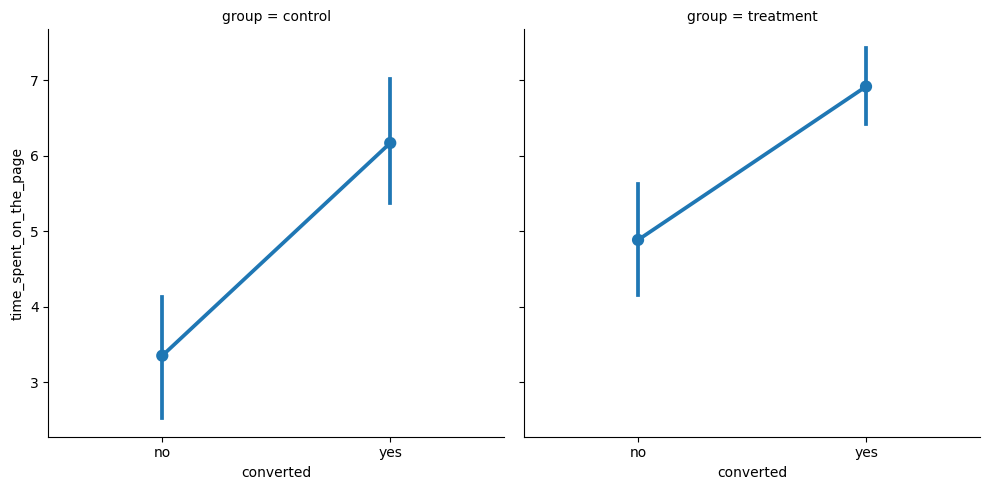

In [ ]:
sns.catplot(data=df,x='converted',y='time_spent_on_the_page',col='group',kind='point');

In [ ]:
df.groupby(['group','converted'])['time_spent_on_the_page'].mean()

group      converted
control    no           3.349310
           yes          6.166190
treatment  no           4.882353
           yes          6.913939
Name: time_spent_on_the_page, dtype: float64

Observation: The users who converted have more average time spent on the landing page no matter the group they are from.(Control/Treatment)

#### Language Preferred vs time spent on the page vs converted vs group

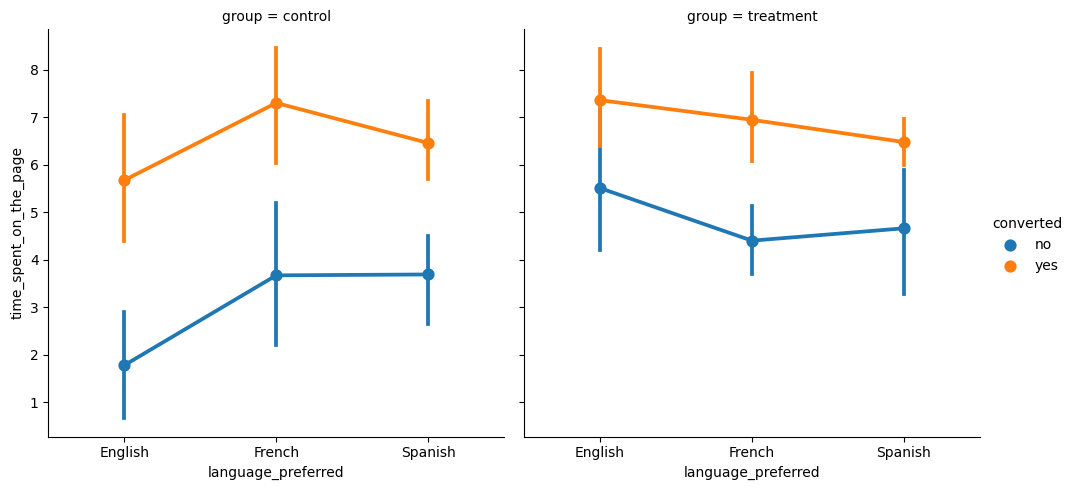

In [ ]:
sns.catplot(data=df,x='language_preferred',y='time_spent_on_the_page',hue='converted',col='group',kind='point');

In [ ]:
df.groupby(['group','language_preferred','converted'])['time_spent_on_the_page'].mean()

group      language_preferred  converted
control    English             no           1.776000
                               yes          5.671818
           French              no           3.669286
                               yes          7.300000
           Spanish             no           3.688000
                               yes          6.457143
treatment  English             no           5.506667
                               yes          7.358000
           French              no           4.400000
                               yes          6.945000
           Spanish             no           4.660000
                               yes          6.476364
Name: time_spent_on_the_page, dtype: float64

Observation: Within the group variance is high in the control group than the treatment group. And this graph more clearly confirms that more time spent on the landing page(New/Old), no matter the language, the person gets converted.

#### Language preferred vs converted vs group

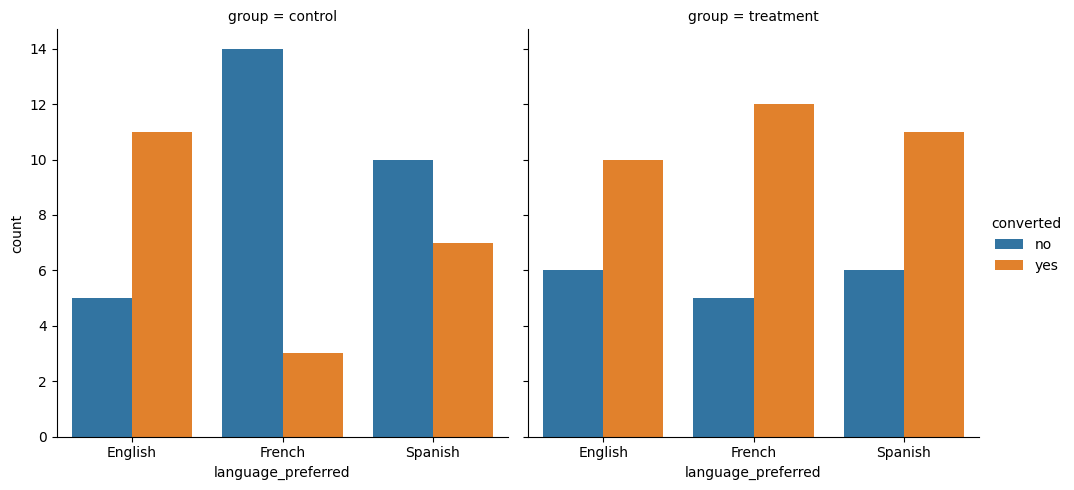

In [ ]:
sns.catplot(data = df, x = 'language_preferred', hue = 'converted', col = 'group', kind = 'count');

In [ ]:
df.groupby(['group','language_preferred'])['converted'].value_counts()

group      language_preferred  converted
control    English             yes          11
                               no            5
           French              no           14
                               yes           3
           Spanish             no           10
                               yes           7
treatment  English             yes          10
                               no            6
           French              yes          12
                               no            5
           Spanish             yes          11
                               no            6
Name: converted, dtype: int64

Observation:
* The conversion count for English remains almost the same for Control and treatment group. But the French conversion rates have gone up so high in the Treatment group from 17% to 71%, similarly in spanish the conversion rates 41% to 64%.
* Overall conversion rates are higher in the Treatment group irrespective of language from 42% to 66%


# A/B Testing:

## Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

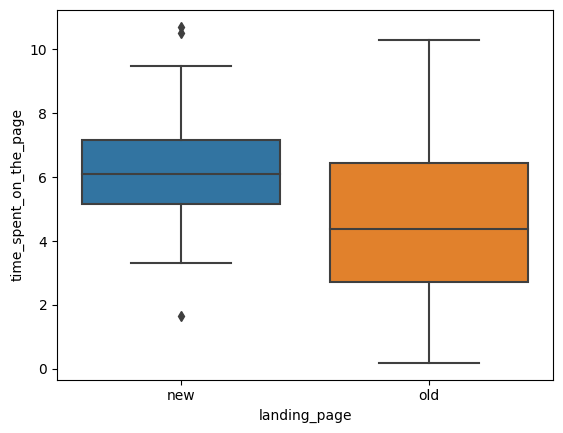

In [ ]:
#Sample1
df_newLandingPage=df[df['landing_page']=='new'].copy()
#Sample2
df_oldLandingPage=df[df['landing_page']=='old'].copy()
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page');

Observation: The mean of new landing page for time spent is higher than the old page visually.

### Step 1: Define the null and alternate hypotheses

$H_0$: Mean time spent on the new landing page equals to the mean time spent on the old landing page (new_mean = old_mean)

$H_0$: μ1=μ2

$H_a$: Mean time spent on the new landing page greater the mean time spent on the old landing page (new_mean > old_mean)

$H_a$: μ1>μ2


### Step 2: Select Appropriate test

Sample1 is the users of the new landing page.
Sample2 is the users of the old landing page.
This is an one-tailed test concerning two population means from two independent populations.

Let's see if T-test assumptions are satisfied or not:

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, From problem statement the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different(1.82,2.58), the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, From the problem statement we know that the collected sample is simple random sample.

We can use **Two Independent Sample T-test for Equality of Means - Unequal Std Dev** for this problem.



### Step 3: Decide the significance level

From the problem statement ,Level of significance is **$\alpha$=0.05** .

### Step 4: Collect and prepare data

In [ ]:
new_mean=df_newLandingPage['time_spent_on_the_page'].mean()
old_mean=df_oldLandingPage['time_spent_on_the_page'].mean()
new_std=df_newLandingPage['time_spent_on_the_page'].std()
old_std=df_oldLandingPage['time_spent_on_the_page'].std()
n_old=df_newLandingPage.shape[0]
n_new=df_oldLandingPage.shape[0]
print('Sample1 mean:',new_mean,'Sample1 Standard deviation:',new_std,'Sample1 Size:',n_new)
print('Sample2 mean:',old_mean,'Sample2 Standard deviation:',old_std,'Sample2 Size:',n_old)


Sample1 mean: 6.2232 Sample1 Standard deviation: 1.8170310387878263 Sample1 Size: 50
Sample2 mean: 4.532400000000001 Sample2 Standard deviation: 2.581974849306046 Sample2 Size: 50


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(df_newLandingPage['time_spent_on_the_page'].dropna(),df_oldLandingPage['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

From the above test we have enough statistical evidence to say that the average time spent on the new landing page greater the average time spent on the old landing page. Thus **rejecting the null hypothesis** that they are equal.

The users spend more time on the new landing page than the existing landing page.

## Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

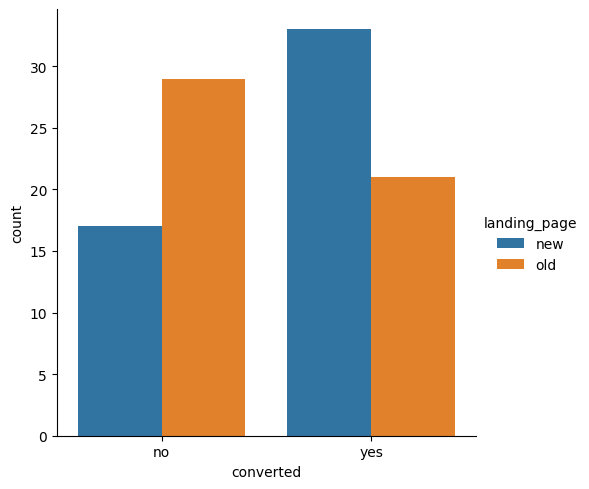

In [ ]:
sns.catplot(data =df,x='converted', hue='landing_page',kind='count');

In [ ]:
df.groupby('landing_page')['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

Observation: The users converted is higher in New page compared to the old page visually.

### Step 1: Define the null and alternate hypotheses

Conversion rate is the proportion of users who visit the landing page and get converted.

$H_0$: The conversion rate for the new page (p1) is equal to the conversion rate for the old page (p2)

$H_0:p_1 =p_2$

$H_a$: The conversion rate for the new page (p1) is greater than the conversion rate for the old page (p2)

$H_a:p_1 > p_2$



### Step 2: Select Appropriate test

Sample1- Proportion of users converted using new landing page.

Sample2- Proportion of users converted using old landing page.

Let's see if the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, User is either converted or not converted.
*   Random sampling from the population - Yes, From the problem statement we know that the collected sample is simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, Central Limit Theorem works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$np_1$= 50 $\cdot$ $\frac{33}{50}$ = 33 $\geq$ 10

>$n(1-p_1)$ = 50 $\cdot$ $\frac{50-33}{50}$ =17 $\geq$ 10

>$np_2$ = 50$\cdot$ $\frac{21}{50}$ =21 $\geq$ 10

>$n(1-p_2)$ = 50 $\cdot$ $\frac{50-21}{50}$ = 29 $\geq$ 10

This is a one-tailed test concerning two population proportions from two independent populations. Based on the above facts, we can perform **Two Proportion Z-test** for this problem.


### Step 3: Decide the significance level

From the problem statement ,Level of significance is **$\alpha$=0.05** .

### Step 4: Collect and prepare data

In [ ]:
# set the counts of defective items
converted_count=np.array([df_newLandingPage[df_newLandingPage['converted']=='yes'].count()['converted'],df_oldLandingPage[df_oldLandingPage['converted']=='yes'].count()['converted']])
print('Converted count',converted_count)
# set the sample sizes
nobs = np.array([df_newLandingPage.shape[0],df_oldLandingPage.shape[0]])
print('Number of observations',nobs)

Converted count [33 21]
Number of observations [50 50]


### Step 5: Calculate the p-value

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs,alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

From the above test we have enough statistical evidence to say that the conversion rate for the new landing page is greater than the conversion rate for the old landing page. Thus **rejecting the null hypothesis** that they are equal.

The conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page.



## Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

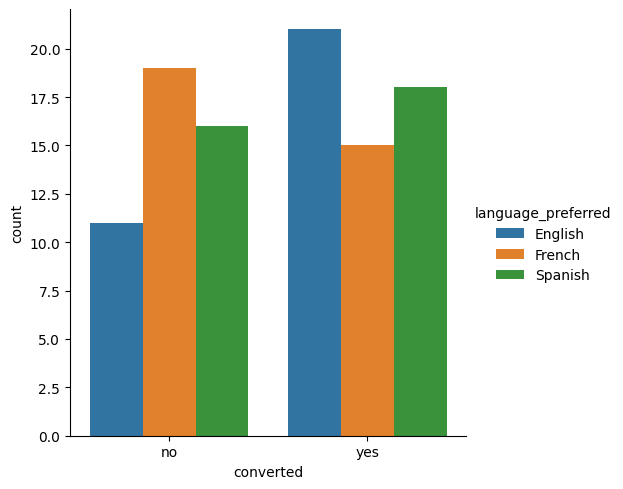

In [ ]:
sns.catplot(data=df,x='converted',hue='language_preferred',kind='count');

In [ ]:
#Checking if the each category has 5 observations minimum
df.groupby('converted')['language_preferred'].value_counts()

converted  language_preferred
no         French                19
           Spanish               16
           English               11
yes        English               21
           Spanish               18
           French                15
Name: language_preferred, dtype: int64

### Step 1: Define the null and alternate hypotheses

$H_0$: Conversion is independent of the language preferences

$H_a$: Conversion is dependent on the language preferences



### Step 2: Select Appropriate test

Let's see if the assumptions are satisfied or not for Chi Square test of independence:

* Categorical variables - Yes, the problem is concerning two categorical variables - converted status and preferred language.
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, From the problem statement we know that the collected sample is simple random sample.

Based on the above facts, we can perform **Chi Square Test for Independence** for this problem.

### Step 3: Decide the significance level

From the problem statement ,Level of significance is **$\alpha$=0.05** .

### Step 4: Collect and prepare data

In [ ]:
#Creating a contingency table with converted and language preferred
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

From the above test we have enough statistical evidence to say that the conversion rate and preferred language are independent. Thus we **fail to reject the null hypothesis**.

The conversion rate and preferred language are independent of each other.

## Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

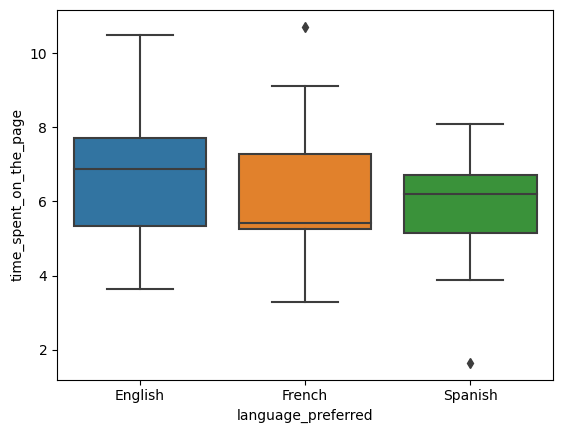

In [ ]:
#Since we are more interested in the new page data we will use 'df_newLandingPage' dataframe
sns.boxplot(data=df_newLandingPage,x='language_preferred',y='time_spent_on_the_page');

In [ ]:
df_newLandingPage.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Observation: English,French,Spanish all have almost similar means.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$, $\mu_2$, $\mu_3$ be the mean time spent on the new page for English, French, Spanish languages respectively.

>$H_0$: $\mu_1$ = $\mu_2$ = $\mu_3$

>$H_a$: At least one mean time spent on the new page is different from the rest.



### Step 2: Select Appropriate test

Based on the problem statement this is concerning three population means and lets check if we can do a ANOVA test.

The normality and equality of variance assumptions need to be checked.

1.  For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

2.  For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the new landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time spent on the new landing page does not follow a normal distribution

In [ ]:
# Checking for Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_newLandingPage['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis.

Time spent on the new landing page follows a normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Check for Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(df_newLandingPage['time_spent_on_the_page'][df_newLandingPage['language_preferred']=='English'],
                            df_newLandingPage['time_spent_on_the_page'][df_newLandingPage['language_preferred']=='French'],
                            df_newLandingPage['time_spent_on_the_page'][df_newLandingPage['language_preferred']=='Spanish'])

# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis.
All the population variances are equal.

 Let's test whether the assumptions are satisfied for ANOVA test:

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, From the problem statement we know that the collected sample is simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

Based on the above facts, we can perform **One-way ANOVA Test** for this problem.

### Step 3: Decide the significance level

From the problem statement ,Level of significance is **$\alpha$=0.05** .

### Step 4: Collect and prepare data

In [ ]:
english_dataframe=df_newLandingPage.loc[df_newLandingPage['language_preferred'] == 'English', 'time_spent_on_the_page']
french_dataframe=df_newLandingPage.loc[df_newLandingPage['language_preferred'] == 'French', 'time_spent_on_the_page']
spanish_dataframe=df_newLandingPage.loc[df_newLandingPage['language_preferred'] == 'Spanish', 'time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(english_dataframe,french_dataframe,spanish_dataframe)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

From the above test we have enough statistical evidence to say that the time spent on the new page is same for the different language users. Thus we **fail to reject the null hypothesis**.

The time spent on the new page is same for the different language users.